## implimentation of example gived in Gmail (solution TD1)

### Define Data

In [2]:
import numpy as np
import matplotlib.pylab as plt 

inputs = np.array([0.1 , 0.3])

weight = np.array([0.5 , 0.2])

bias = np.array([1.83])

real_output = np.array([0.03])


### Define our function

1) activation function 

In [3]:
def activation (sum):
    return  1/(1 + np.exp(-sum)) 

2) function that calculate the weighted sum of input plus bias 

In [4]:
def model (inputs ,weight ,bias):
    sum = np.dot(inputs,weight ) + bias
    return sum

3) calculating the output using the nueral network

In [5]:
predicted_output = activation(model(inputs , weight , bias))
predicted_output

array([0.87435214])

3) calculating the error 

In [6]:
def calculate_error (predicted_output , real_output):
    return ((real_output - predicted_output)**2)/2

In [7]:
error = calculate_error(predicted_output , real_output)
error

array([0.35646527])

4) calculate the gradiant dw and db

In [8]:
def gradient(inputs , weight , bias ,  predicted_output ,  real_output  ):
    dw = (predicted_output -real_output) * (np.exp(model(inputs , weight , bias))/(1+np.exp(model(inputs , weight , bias)))**2) * inputs.T
    db = (predicted_output -real_output) * (np.exp(model(inputs , weight , bias))/(1+np.exp(model(inputs , weight , bias)))**2)
    return dw , db

In [9]:
dw , db =gradient(inputs , weight , bias , predicted_output , real_output)
print(f"dw1 = {dw[0]} , dw2 = {dw[1]} and db = {db[0]}")

dw1 = 0.009276092558183863 , dw2 = 0.027828277674551587 and db = 0.09276092558183863


5) update the weight and the bias

In [10]:
def update (dw , db , weight , bias , learning_rate):
    if dw.ndim == 1:
        weight = weight.astype(float) - learning_rate * dw
    else:
        weight = weight.astype(float) - learning_rate * np.sum(dw, axis=-1)
    bias = bias.astype(float) - learning_rate * db
    return weight, bias

In [11]:
update(dw ,db ,weight ,bias , 0.01)

(array([0.49990724, 0.19972172]), array([1.82907239]))

6) combine all the privious step and repeat it by certain number which is called epoch number 

In [12]:
def artificial_nueral(inputs , weight , bias , real_output , epoch_number =60 , learning_rate = 0.001):
    cost = []

    for i in range(epoch_number):
        predicted_output = activation(model(inputs , weight , bias))
        cost.append(calculate_error(predicted_output , real_output))
        dw , db = gradient(inputs , weight , bias ,predicted_output , real_output)
        weight , bias = update(dw ,db ,weight ,bias ,learning_rate)
        print(weight)
    plt.plot(cost)
    plt.show()
    return weight ,bias


[0.49999072 0.19997217]
[0.49998145 0.19994434]
[0.49997217 0.19991651]
[0.49996289 0.19988868]
[0.49995361 0.19986084]
[0.49994433 0.199833  ]
[0.49993506 0.19980517]
[0.49992577 0.19977732]
[0.49991649 0.19974948]
[0.49990721 0.19972164]
[0.49989793 0.19969379]
[0.49988865 0.19966594]
[0.49987937 0.1996381 ]
[0.49987008 0.19961024]
[0.4998608  0.19958239]
[0.49985151 0.19955454]
[0.49984223 0.19952668]
[0.49983294 0.19949882]
[0.49982365 0.19947096]
[0.49981437 0.1994431 ]
[0.49980508 0.19941524]
[0.49979579 0.19938737]
[0.4997865 0.1993595]
[0.49977721 0.19933164]
[0.49976792 0.19930377]
[0.49975863 0.19927589]
[0.49974934 0.19924802]
[0.49974005 0.19922014]
[0.49973076 0.19919227]
[0.49972146 0.19916439]
[0.49971217 0.19913651]
[0.49970287 0.19910862]
[0.49969358 0.19908074]
[0.49968428 0.19905285]
[0.49967499 0.19902496]
[0.49966569 0.19899707]
[0.49965639 0.19896918]
[0.4996471  0.19894129]
[0.4996378  0.19891339]
[0.4996285 0.1988855]
[0.4996192 0.1988576]
[0.4996099 0.1988297]


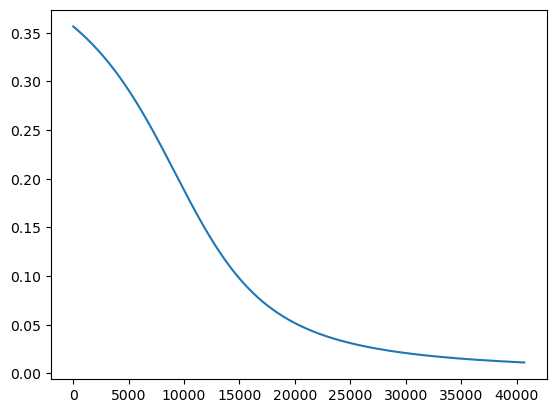

(array([ 0.18578771, -0.74263687]), array([-1.31212289]))

In [13]:
artificial_nueral(inputs ,weight ,bias ,real_output  ,40690)

### implimentation of example gived in gmail (Exercice suit part 1)

In [14]:
inputs = np.array([
    [0 , 3],
    [1 , 1.5],
    [1 , 4],
    [1.5 , 2.5],
    [2 , 2.5],
    [3 , 3.5],
    [3.5 , 3.25],
    [4 , 3],
    [4 , 4],
    [5 , 4],
    [1 , 1],
    [2 , 0.5],
    [2 , 2],
    [3 , 1.5],
    [3 , 2.75],
    [4 , 1],
    [4 , 2.5],
    [4.5 , 3],
    [5 , 1],
    [5 , 2.25],
    ]
    )

weight = np.array([0 , 1])

bias = np.array([-2])

real_output = np.array([
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
])

inputs.shape , weight.shape , bias , real_output.shape

((20, 2), (2,), array([-2]), (20,))

[7.74259793e-04 9.98076023e-01]
[0.00154728 0.99614855]
[0.00231907 0.9942176 ]
[0.00308963 0.99228317]
[0.00385897 0.99034528]
[0.0046271  0.98840394]
[0.00539402 0.98645917]
[0.00615975 0.98451097]
[0.0069243  0.98255936]
[0.00768766 0.98060436]
[0.00844986 0.97864597]
[0.00921089 0.97668422]
[0.00997078 0.97471912]
[0.01072952 0.97275068]
[0.01148713 0.97077892]
[0.01224362 0.96880386]
[0.012999   0.96682551]
[0.01375329 0.9648439 ]
[0.01450648 0.96285903]
[0.01525859 0.96087093]
[0.01600964 0.95887962]
[0.01675964 0.95688511]
[0.0175086  0.95488743]
[0.01825653 0.9528866 ]
[0.01900344 0.95088263]
[0.01974935 0.94887556]
[0.02049427 0.94686539]
[0.02123822 0.94485216]
[0.02198121 0.94283588]
[0.02272325 0.94081658]
[0.02346436 0.93879429]
[0.02420455 0.93676902]
[0.02494384 0.93474081]
[0.02568224 0.93270967]
[0.02641978 0.93067564]
[0.02715646 0.92863874]
[0.02789231 0.92659899]
[0.02862733 0.92455644]
[0.02936155 0.92251109]
[0.03009499 0.92046299]
[0.03082765 0.91841216]
[0.03155

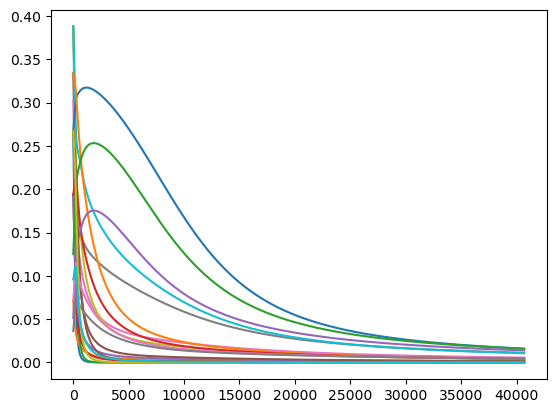

In [16]:
w , b =artificial_nueral(inputs ,weight ,bias ,real_output ,40690)

In [17]:
print("w=",w)
print("b=",b)

w= [ 1.94343961 -1.77222547]
b= [-2.0520274  -2.22705355 -2.0729711  -2.15145005 -2.3391543  -2.46841359
 -3.17498986 -4.19557311 -3.01233057 -4.39574288  1.35628651 -0.69644192
  1.1850749  -0.87965328  0.65022928 -1.77777142 -1.06850912 -1.16206216
 -1.8861025  -1.82467675]
